In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# check missing values
missing_values = df.isnull().sum()
print('Missing Values in each columns:\n', missing_values)


Missing Values in each columns:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
#drop unneccessary columns

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],
        axis=1, inplace=True)

In [7]:
# unique values in each columns

df.nunique(axis=0)

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


**Visualization**

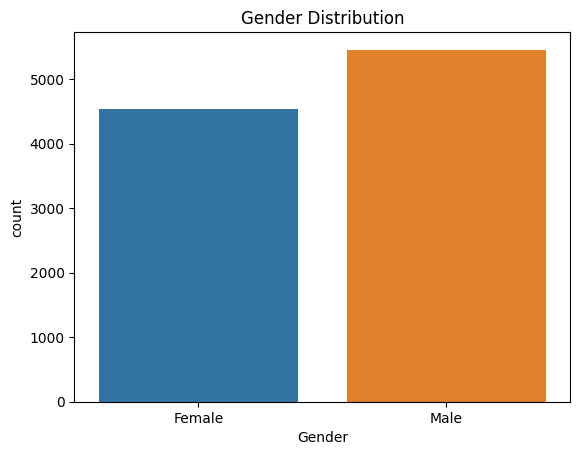

In [8]:
# Gender Distribution

sns.countplot(x='Gender', hue='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

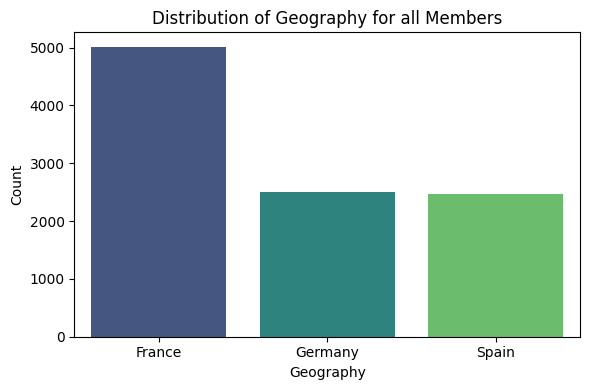

In [9]:
# Distribution of Geography

geography = df.groupby('Geography').count()['CreditScore']
geography.name = 'Member Count'
geography = geography.reset_index()

# plot
plt.figure(figsize=(6,4))
sns.barplot(data=geography, x='Geography', y='Member Count',
            palette='viridis')

plt.title('Distribution of Geography for all Members')
plt.ylabel('Count')
plt.xlabel('Geography')

plt.tight_layout()
plt.show()

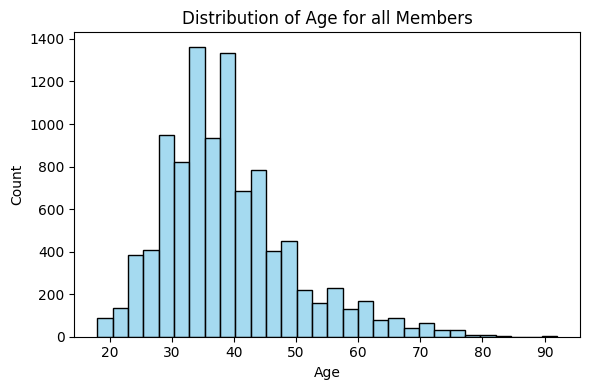

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', bins=30, kde=False, color='skyblue')

plt.title('Distribution of Age for all Members')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
columns = ['Geography', 'Gender']
label_encode = LabelEncoder()

for col in columns:
  df[col] = label_encode.fit_transform(df[col])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

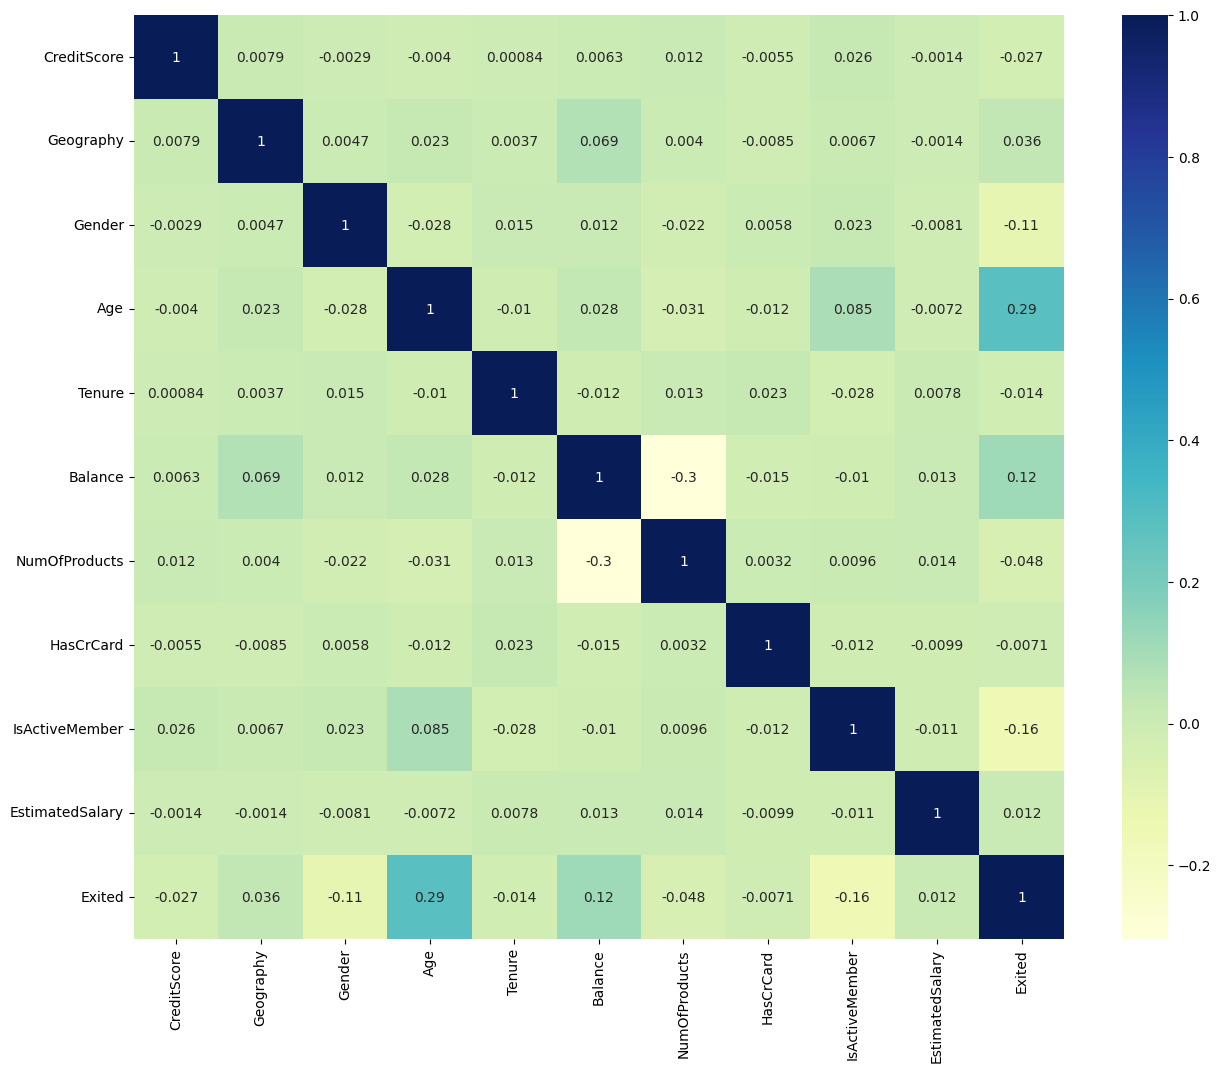

In [11]:
# correlation

corr = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

**Modeling**

In [12]:
x = df.drop(['Exited'], axis=1)
y = df['Exited']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2,
                                                random_state=42)

In [13]:
model_list = [LogisticRegression(), SVC(), DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100),
              GradientBoostingClassifier(n_estimators=100),
              KNeighborsClassifier(n_neighbors=5),
              GaussianNB()]

accuracy_list = []

for model in model_list:
    model.fit(xtrain, ytrain)
    model_cv = cross_val_score(model, x, y, cv=10, scoring='accuracy', n_jobs=-1)

    accuracy_list.append((model.__class__.__name__, model_cv.mean()))

    print(f"{model.__class__.__name__} cross validation score: {model_cv.mean() * 100:.2f}%")
    print("-" * 50)

LogisticRegression cross validation score: 79.20%
--------------------------------------------------
SVC cross validation score: 79.63%
--------------------------------------------------
DecisionTreeClassifier cross validation score: 79.32%
--------------------------------------------------
RandomForestClassifier cross validation score: 86.22%
--------------------------------------------------
GradientBoostingClassifier cross validation score: 86.37%
--------------------------------------------------
KNeighborsClassifier cross validation score: 76.64%
--------------------------------------------------
GaussianNB cross validation score: 78.31%
--------------------------------------------------


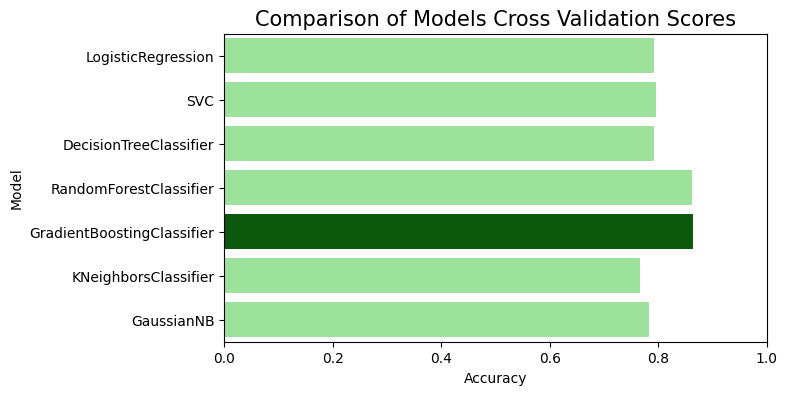

In [17]:
model_names, scores = zip(*accuracy_list)

# highlight the best model
clrs = ["darkgreen" if s == max(scores) else "lightgreen" for s in scores]

plt.figure(figsize=(7, 4))
sns.barplot(x=scores, y=model_names, palette=clrs)
plt.title('Comparison of Models Cross Validation Scores', fontsize=15)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

**Hyperparameter**

In [18]:
param_grid = {'n_estimators': [50,100,150,200],
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': [2,3,4],
              'subsample': [0.5, 1.0]}

grid_search = GridSearchCV(GradientBoostingClassifier(
    random_state=42), param_grid, scoring='accuracy',
                           cv=5, n_jobs=1)
grid_search.fit(xtrain, ytrain)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}
Best Score: 0.861375


In [19]:
best_model = grid_search.best_estimator_
ytrain_pred = best_model.predict(xtrain)

#calculate and print the accuracy on the training list
train_accuracy = accuracy_score(ytrain, ytrain_pred)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

#Make predictions on the testing set
ytest_pred = best_model.predict(xtest)

#calculate and print the accuracy on the training list
test_accuracy = accuracy_score(ytest, ytest_pred)
print(f"Testing Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.87
Testing Set Accuracy: 0.87
